# <center>Topic 2: Models
---
---

Statistical modeling is the process of applying statistical analysis to a dataset. A statistical model is like a mathematical representation of data. This allows data analyists to identify the relationships between variables, make predictions and create visualizations of the data so that non-analysts can understand and leverage it. Some of the techniques used are Regression Models and Classification Models.

Regression Models can examine relationships between variables, for example to determine which independent variables hold the most influence over dependent variables. Classification Models look to classify data points into some category. It is a form of supervised machine learning in which the data is known.

If you have a group of data points, you may want to plot them and then find a line that best fits the data. Different mathematical equations can represent different line types. The best parameters for an equation could be found be repeatedly trying many different values, but this can be cumbersome. A "best" fit line can be found by minimizing the Cost function associated with the line.

---

### Exercise1: Use numpy and matplotlib to plot the absolute value function. Explain why the absolute value function is not typically used to fit straight lines to data. 

In mathematics, the absolute value or modulus of a real number $x$, denoted $|x|$, is the non-negative value of $x$ without regard to its sign. Namely, $|x|=x$ if x is a positive number, and $|x|=-x$ if $x$ is negative (in which case negating $x$ makes $-x$ positive), and $|0|=0$. 

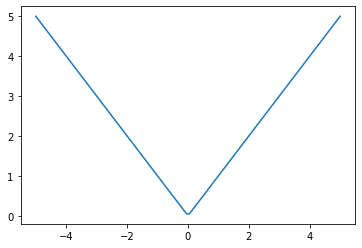

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Lispace numpy method to return evenly spaces numbers over a given interval, 'num' is the number of data points.
x = np.linspace(-5, 5, num=110)
# numpy absolute method used to get the absolute value element-wise.
plt.plot(x, np.absolute(x))
plt.show()

The absolute value function isn't used to fit straight lines of data because the absolute values result in discontinuous derivatives that can't be treated analytically. If using the absolute value function, one still has to go through the entire process of drawing vertical regression lines from the data points to an estimated line of best fit, measuring the distances and summing them. 
The graph of the absolute value function looks like the line $y = x$ for positive $x$ and $y = −x$ for negative
$x$. Both of these functions have a y-intercept of 0, and since the function is defined to be 0 at $x = 0$, the
absolute value function is continuous. Despite being continuous, the absolute value function ($f(x) = |x|$), is not differentiable at $x = 0$

---

### Exercise 2: Fit a straight line to the following data points, using all three methods used above. Do you think a straight line is a good model for these points?

In [2]:
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]

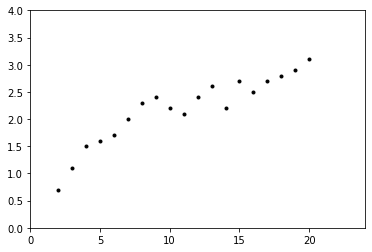

In [3]:
# A simple graph of the data points:
import matplotlib.pyplot as plt
#plt.plot([2, 0.7], [3, 1.1], [4, 1.5], [5. 1.6], [6. 1.7], [7, 2], [8, 2.3], [9, 2.4], [10, 2.2], [11, 2.1], [12, 2.4], [13, 2.6], [14, 2.2], [15, 2.7], [16, 2.5], [17, 2.7], [18, 2.8], [19, 2.9], [20, 3.1])
plt.plot(x, y, 'k.')
plt.xlim([0, 24])
plt.ylim([0, 4])
plt.show()

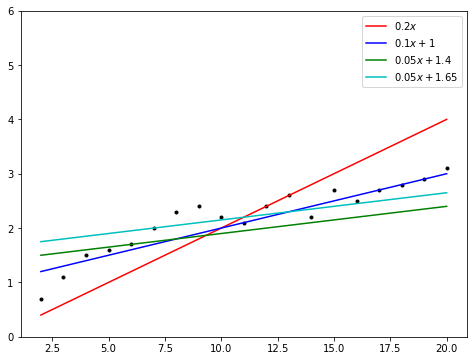

In [4]:
# A straight line is represented by the equation: y = mx + c. Testing different values for m (the slope) and c (a constant):
import numpy as np
plt.rcParams['figure.figsize'] = (8, 6)
x = np.asarray(x)
plt.plot(x, y, 'k.')
plt.plot(x, 0.2 * x, 'r-', label=r"$0.2x$")
plt.plot(x, 0.1 * x + 1, 'b-', label=r"$0.1x + 1$")
plt.plot(x, 0.05 * x + 1.4, 'g-', label=r"$0.05x + 1.4$")
plt.plot(x, 0.05 * x + 1.65, 'c-', label=r"$0.05x + 1.65$")
plt.ylim([0, 6])
plt.legend()
plt.show()

In [5]:
# Calculate the best values for x and y:
x_avg = np.mean(x)
y_avg = np.mean(y)

# Subtract means from x and y.
x_zero = x - x_avg
y_zero = y - y_avg

# The best m is found by the following calculation.
m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)
# Use m from above to calculate the best c.
c = y_avg - m * x_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 0.103158 and c is 1.049474.


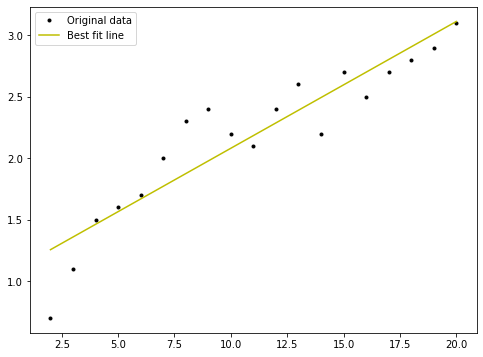

In [6]:
# Plot the best fit line.
plt.plot(x, y, 'k.', label='Original data')
plt.plot(x, m * x + c, 'y-', label='Best fit line')
plt.legend()
plt.show()

In [7]:
cost = lambda m,c: np.sum([(y[i] - m * x[i] - c) ** 2 for i in range(x.size)])
print("Cost with m = %5.2f and c = %5.2f = %3.2f" % (m, c, cost(m, c)))

Cost with m =  0.10 and c =  1.05 = 1.04


<b>Optimization</b>

In [8]:
import scipy.optimize as so

In [9]:
import numpy as np
# Fix x values.
x = np.array(x)

# Fix y values.
y = np.array(y)
x, y

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20.]),
 array([0.7, 1.1, 1.5, 1.6, 1.7, 2. , 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2,
        2.7, 2.5, 2.7, 2.8, 2.9, 3.1]))

In [10]:
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [11]:
result = so.minimize(cost, (2.0, 2.0))
# Show the results:
result

      fun: 1.0395789473691037
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245614]])
      jac: array([2.98023224e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [12]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315786014998399, 1.04947405671058)

In [20]:
# Previous, analytical result.
m_a, c_a = np.polyfit(x, y, 1)
# Print analytical results.
m_a, c_a

(0.1031578947368421, 1.0494736842105261)

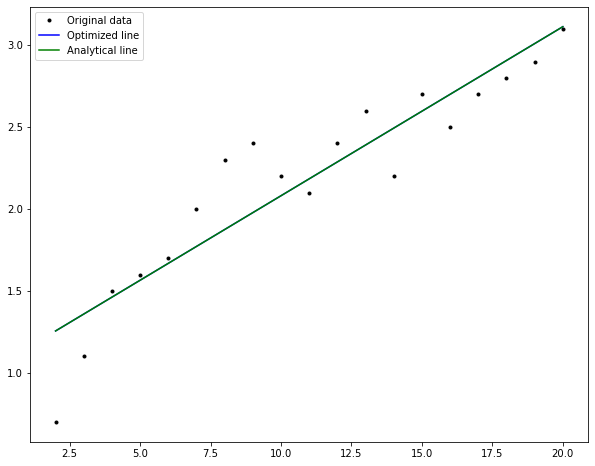

In [21]:
# Plot the best fit line from the optimization.
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_o * x + c_o, 'b-', label='Optimized line')
ax.plot(x, m_a * x + c_a, 'g-', label='Analytical line')
ax.legend()

# Show the plot.
plt.show()

<b>Curve Fitting<b>

In [13]:
# Creating the model function:
def f(x, m, c):
    return m * x + c

In [14]:
# Optimization method known as curve fit
res = so.curve_fit(f, x, y)

In [15]:
res

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [16]:
m_f, c_f = res[0]
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

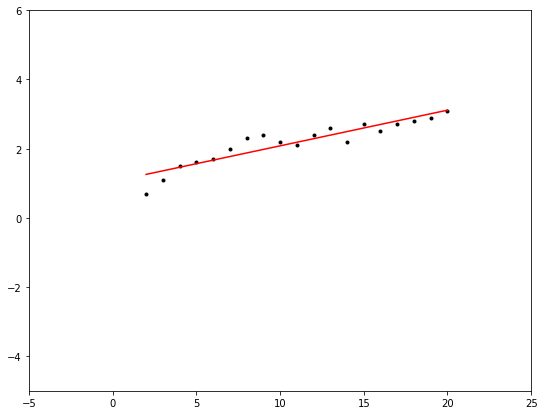

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9, 7))
ax.plot(x, y, 'k.', label='Original data')
ax.plot(x, m_f * x + c_f, 'r-', label='Curve Fit line')
#ax.legend()
plt.xlim(-5, 25)
plt.ylim(-5, 6)
plt.show()

In [ ]:
from scipy import stats
slope, intercept, r, p, se = stats.linregress(x, y)

In [ ]:
slope, intercept, r, p, se

In [ ]:
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")

The cost function indicates how well or badly the model is performing. The low value outputted below shows that there are small differences relatively speaking, between the actual values and the values derived using the curve fit optimization method.

In [28]:
cost((0.10315789458399933, 1.0494736859688867))

1.0395789473684207

---

### References:

'Absolute Value' Wikipedia (2022). Author: David Eppstein. Available at: https://en.wikipedia.org/wiki/Absolute_value#Absolute_value_function 
(Accessed: 18th October 2022).

Numpy.absolute¶ (2011) numpy.absolute - NumPy v1.6 Manual (DRAFT). Available at: https://docs.scipy.org/doc/numpy-1.6.0/reference/generated/numpy.absolute.html (Accessed: November 8, 2022).